In [1]:
import numpy as np

In [32]:
sample = np.random.choice([0, 1], size=1000, p=[0.7, 0.3])

In [33]:
a = [0]
b = [0]
probs = []

for i in range(1, 1000):
    a.append(a[i-1] + sample[i])
    b.append(b[i-1] + 1)
    probs.append(a[i] / b[i])

AttributeError: 'BarContainer' object has no attribute 'set_animated'

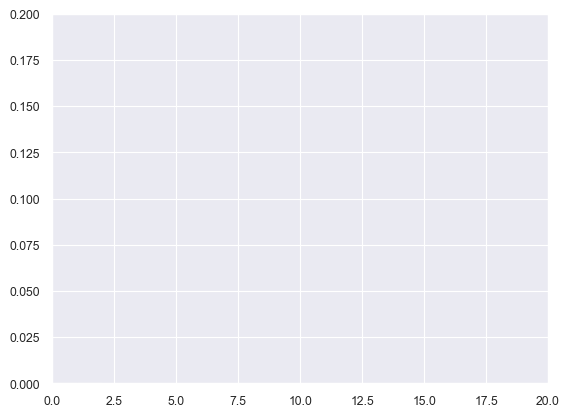

In [34]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 20)
ax.set_ylim(0, 0.2)
lines = ax.bar([0, 1], [0, 0], color='blue', width=1, align='edge')
# stems, = ax.plot([0, 1], [], marker='o', linestyle = 'None', color='red')
stem_sup = np.array(range(12, 30, 3))


# Initialize the line to be empty
def init():
    lines[0].set_height(0)
    lines[1].set_height(0)
    return lines,

# Generate the frames for the animation
def update(frame):
    p = probs[frame]
    # x = np.arange(0, 20)
    # y = norm.pdf(x, loc=mus[frame], scale=np.sqrt(sigmas[frame]))
    lines[0].set_data([1-p])
    lines[1].set_data([p])
    # p_i = frame**stem_sup * np.exp(-frame) / factorial(stem_sup)
    # mu_prob = norm.pdf(mus[frame], loc=mus[frame], scale=np.sqrt(sigmas[frame]))

    # stems.set_data(mus[frame], mu_prob )

    ax.set_title(f'Bernoulli Distribution ({p:.2f})'.format(frame))
    return lines,

# Create the animation
frames = range(0, 100, 5)  # Lambda values for each frame
ani = animation.FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

# Display the animation
plt.show()


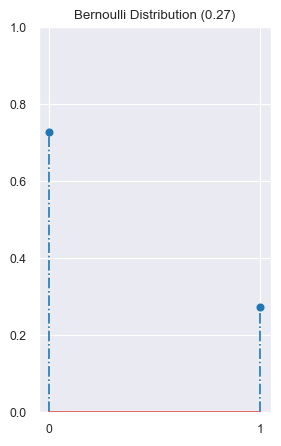

In [41]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(3, 5)
x = [0, 1]
y = [0.5, 0.5]
markerline, stemlines, baseline = ax.stem(x, np.cos(x), '-.')
ax.set_xticks([0, 1])
def update(i):
    ax.cla()
    p = probs[i]
    markerline, stemlines, baseline = ax.stem([0, 1], [1-p, p], '-.')
    ax.set_ylim((0, 1))
    ax.set_xticks([0, 1])
    ax.set_title(f'Bernoulli Distribution ({p:.2f})'.format(i))
    
anim = FuncAnimation(fig, update, frames=range(10, 110, 10), interval=500)
anim.save('../bern.gif', fps=4, writer='imagemagick')